# Manual Graph of Thoughts Demo: Intersect Set with Simulated Language Model
This example shows how to use the `pure_graph_of_thoughts` package for manual graph of operations construction using the simulated Language Model.

The example task `intersect_set` (defined in `intersect_set.py`) is used.

## Construct Graph of Operations
The graph of operations is constructed.

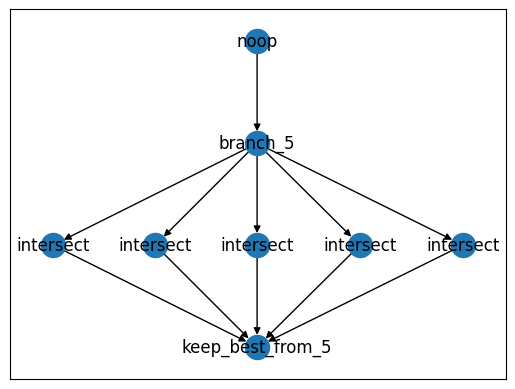

In [7]:
from pure_graph_of_thoughts.api.graph.operation import OperationNode, GraphOfOperations
from pure_graph_of_thoughts.visualization import plot_graph

from auto_graph_of_thoughts.language_model.simulated_chat_gpt_intersect_set import \
    create_simulated_deterministic_chat_gpt_intersect_set
from auto_graph_of_thoughts.tasks.intersect_set import op_intersect, op_noop, op_branch_5, \
    op_keep_best_from_5


def _create_intersect_set_graph_of_operations() -> GraphOfOperations:
    source = OperationNode.of(op_noop)
    branch_sink_nodes = []
    branch_node = source.append_operation(op_branch_5)
    intersect_nodes = []
    for _ in range(5):
        intersect_node = branch_node.append_operation(op_intersect)
        intersect_nodes.append(intersect_node)

    keep_best = OperationNode.of(op_keep_best_from_5)
    branch_sink_nodes.append(keep_best)

    keep_best = OperationNode.of(op_keep_best_from_5)
    for intersect_node in intersect_nodes:
        intersect_node.append(keep_best)

    return GraphOfOperations.from_source(source)


intersect_set_graph_of_operations: GraphOfOperations = _create_intersect_set_graph_of_operations()
plot_graph(intersect_set_graph_of_operations)

## Execute Graph of Operations
A simulated language model is used as the executing language model.

In [8]:
from pure_graph_of_thoughts.controller import CompleteGraphController
import logging

logging.basicConfig(level=logging.INFO)

SEED = 0

ctrl = CompleteGraphController(
    language_model=create_simulated_deterministic_chat_gpt_intersect_set(SEED)
)

INFO:CompleteGraphController:Traversing node ff739fac-74e0-43b1-87a9-864df91d357a
INFO:CompleteGraphController:Processing operation ExecOperation(name='noop', n_inputs=1, n_outputs=1, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 1))
INFO:CompleteGraphController:Traversing node ab33ec79-4a85-49f6-bd02-2875049afa5d
INFO:CompleteGraphController:Processing operation ExecOperation(name='branch_5', n_inputs=1, n_outputs=5, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 1))
INFO:CompleteGraphController:Traversing node 09fb373a-d707-4611-81fa-9e3199756f08
INFO:CompleteGraphController:Processing operation PromptOperation(name='intersect', n_inputs=1, n_outputs=1, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 1))
INFO:CompleteGraphController:Traversing node 0f57c235-24ce-497a-8222-f91f28199240
INFO:CompleteGraphController:Processing operation PromptOperation(name='intersect', n_inputs=1, n_outputs=1, type=<Operation

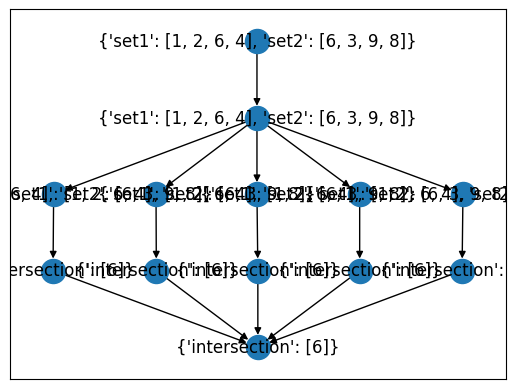

In [9]:
set1 = [
    1, 2, 6, 4
]
set2 = [
    6, 3, 9, 8
]
intersect_set_graph_of_thoughts = ctrl.execute_graph(intersect_set_graph_of_operations, init_state={
    'set1': set1,
    'set2': set2
})
plot_graph(intersect_set_graph_of_thoughts)

In [10]:
set(set1).intersection(set(set2))

{6}